# Image classification

In [2]:
import pandas as pd
import numpy as np
import regex
import requests
import unidecode
import numpy as np
import os, glob
import cv2
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil, sys
import urllib.request 
import PIL
import tensorflow as tf
import keras
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD

2022-09-17 15:14:00.046728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from IPython.display import Image
from keras.preprocessing import image 
from keras import optimizers,layers, models,regularizers   
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator 
from keras.applications.vgg16 import VGG16

In [10]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator


In [3]:
!pip install pandas 
!pip install opencv-python
!pip install plotly==5.10.0
!pip install pillow
!pip install regex
!pip install Unidecode
!pip install wordcloud
!pip install nltk
!pip install matplotlib

Multiple nets: https://medium.com/analytics-vidhya/multi-class-image-classification-using-transfer-learning-with-deep-convolutional-neural-networks-eab051cde3fb


Current tutorial: https://www.kaggle.com/code/shahules/getting-started-with-cnn-and-vgg16 

# Inception V3

In [29]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory("images_train/",class_mode='categorical',batch_size=64,target_size=(150,150))
tsdata = ImageDataGenerator()
testdata = trdata.flow_from_directory("images_test/",class_mode='categorical',batch_size=64,target_size=(150,150))

Found 22362 images belonging to 32 classes.
Found 4793 images belonging to 32 classes.


In [38]:
InceptionV3_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(150,150,3),weights='imagenet', include_top=False)
for layer in InceptionV3_model.layers[:249]:
    layer.trainable = False
for layer in InceptionV3_model.layers[249:]:
    layer.trainable = True
InceptionV3_last_output = InceptionV3_model.output
InceptionV3_maxpooled_output = Flatten()(InceptionV3_last_output)
InceptionV3_x = Dense(1024, activation='relu')(InceptionV3_maxpooled_output)
InceptionV3_x = Dropout(0.5)(InceptionV3_x)
InceptionV3_x = Dense(32, activation='softmax')(InceptionV3_x)
InceptionV3_x_final_model = tf.keras.Model(inputs=InceptionV3_model.input,outputs=InceptionV3_x)
InceptionV3_x_final_model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['acc'])

number_of_epochs = 60
inception_filepath = 'inceptionv3_'+'-saved-model-{epoch:02d}-acc-{val_acc:.2f}.hdf5'
inception_checkpoint = tf.keras.callbacks.ModelCheckpoint(inception_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
inception_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
inceptionv3_history = InceptionV3_x_final_model.fit(traindata,epochs = number_of_epochs, validation_data = testdata,callbacks=[inception_checkpoint,inception_early_stopping],verbose=1)


Epoch 1/60
350/350 [==============================] - ETA: 0s - loss: 3.4312 - acc: 0.0927
Epoch 1: val_acc improved from -inf to 0.16608, saving model to inceptionv3_-saved-model-01-acc-0.17.hdf5
350/350 [==============================] - 1141s 3s/step - loss: 3.4312 - acc: 0.0927 - val_loss: 3.1363 - val_acc: 0.1661
Epoch 2/60
350/350 [==============================] - ETA: 0s - loss: 3.0584 - acc: 0.1784
Epoch 2: val_acc improved from 0.16608 to 0.20092, saving model to inceptionv3_-saved-model-02-acc-0.20.hdf5
350/350 [==============================] - 1123s 3s/step - loss: 3.0584 - acc: 0.1784 - val_loss: 2.9852 - val_acc: 0.2009
Epoch 3/60
350/350 [==============================] - ETA: 0s - loss: 2.8713 - acc: 0.2220
Epoch 3: val_acc improved from 0.20092 to 0.22157, saving model to inceptionv3_-saved-model-03-acc-0.22.hdf5
350/350 [==============================] - 1629s 5s/step - loss: 2.8713 - acc: 0.2220 - val_loss: 2.8896 - val_acc: 0.2216
Epoch 4/60
350/350 [==============

350/350 [==============================] - ETA: 0s - loss: 0.9559 - acc: 0.7231
Epoch 27: val_acc did not improve from 0.34467
350/350 [==============================] - 1290s 4s/step - loss: 0.9559 - acc: 0.7231 - val_loss: 2.6094 - val_acc: 0.3332
Epoch 28/60
350/350 [==============================] - ETA: 0s - loss: 0.9086 - acc: 0.7367
Epoch 28: val_acc did not improve from 0.34467
350/350 [==============================] - 1114s 3s/step - loss: 0.9086 - acc: 0.7367 - val_loss: 2.6183 - val_acc: 0.3388
Epoch 29/60
350/350 [==============================] - ETA: 0s - loss: 0.8674 - acc: 0.7472
Epoch 29: val_acc did not improve from 0.34467
350/350 [==============================] - 1097s 3s/step - loss: 0.8674 - acc: 0.7472 - val_loss: 2.6263 - val_acc: 0.3445
Epoch 30/60
350/350 [==============================] - ETA: 0s - loss: 0.8070 - acc: 0.7658
Epoch 30: val_acc did not improve from 0.34467
350/350 [==============================] - 1232s 4s/step - loss: 0.8070 - acc: 0.7658 -

350/350 [==============================] - ETA: 0s - loss: 0.2793 - acc: 0.9043
Epoch 57: val_acc did not improve from 0.35343
350/350 [==============================] - 1243s 4s/step - loss: 0.2793 - acc: 0.9043 - val_loss: 3.1212 - val_acc: 0.3472
Epoch 58/60
350/350 [==============================] - ETA: 0s - loss: 0.2669 - acc: 0.9079
Epoch 58: val_acc did not improve from 0.35343
350/350 [==============================] - 1226s 4s/step - loss: 0.2669 - acc: 0.9079 - val_loss: 3.2012 - val_acc: 0.3390
Epoch 59/60
350/350 [==============================] - ETA: 0s - loss: 0.2685 - acc: 0.9069
Epoch 59: val_acc did not improve from 0.35343
350/350 [==============================] - 1245s 4s/step - loss: 0.2685 - acc: 0.9069 - val_loss: 3.1575 - val_acc: 0.3465
Epoch 60/60
350/350 [==============================] - ETA: 0s - loss: 0.2653 - acc: 0.9083
Epoch 60: val_acc did not improve from 0.35343
350/350 [==============================] - 1426s 4s/step - loss: 0.2653 - acc: 0.9083 -

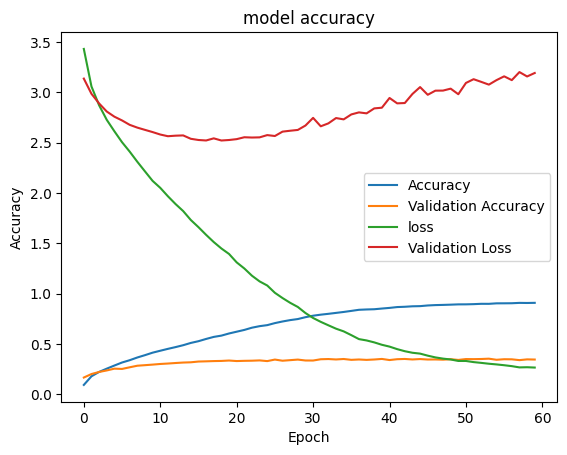

In [43]:
import matplotlib.pyplot as plt
plt.plot(inceptionv3_history.history["acc"])
plt.plot(inceptionv3_history.history['val_acc'])
plt.plot(inceptionv3_history.history['loss'])
plt.plot(inceptionv3_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [41]:
inceptionv3_history